#Trabajo Práctico N°3


Importamos Spacy e instanciamos modelo

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

Importamos otras librerías




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [ ]:
pd.set_option("display.max_colwidth", None)

In [2]:
!pip install transformers
!pip install sentence-transformers
!pip install keybert
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=105948c7a005b342e9103556d97a5f899bdd9824801097672f133c8acd90ca73
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
  Preparing metadata (setup.py) ... done
  Created wheel for keybert

Cargamos el .csv con el dataset

In [ ]:
PATH = '/content/reviews_sentiments.csv'
dataset = pd.read_csv(PATH,on_bad_lines='skip')

Printeamos los 10 primeros datos del dataset

In [ ]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,0,0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"['phd', 'ga', 'year ago', 'sci']","['outset', 'respect', 'author', 'attack', 'phd...","[outset review respect author sheer guile, att...",2,POS,"['engineering', 'programming', 'topic']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
1,1,1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"['capitalism', 'read', 'book', 'bookstore', 'r...","[capitalism good read book, nearby bookstore, ...",2,POS,"['capitalism', 'bookstore', 'amazon']",75,50,75_textbook_price_sentence_author,"['textbook', 'price', 'sentence', 'author', 'w...",['worth money reasons writing book barely acce...
2,2,2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"['science', 'material', 'use', 'video', 'book'...",[datum science confused material use video boo...,1,POS,"['educational', 'educate', 'resource']",13,133,13_science_datum_field_indy,"['science', 'datum', 'field', 'indy', 'scienti...","['good introduction datum science', 'learn fas..."
3,3,3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,['phd'],"['book', 'variety', 'topic', 'detail', 'reader...","[general good book, wide variety topic, detail...",2,NEU,"['book', 'reader', 'subject']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
4,4,4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"['decade', 'coin love', 'sas s r']","['datum', 'scientist', 'decade', 'term', 'coin...",[academic datum scientist decade term coin lov...,1,POS,"['python', 'programming', 'datum']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
5,5,5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[],"['book', 'approach', 'statistic', 'encounter',...","[book nice approach, basic statistic encounter...",1,POS,"['statistic', 'programming', 'introductory']",0,388,0_statistic_stat_statistical_statistics,"['statistic', 'stat', 'statistical', 'statisti...",['book happen understand statistic deep fundam...
6,6,6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[],"['science', 'book', 'course', 'information', '...","[important data science book, expensive course...",1,NEU,"['book', 'data', 'chapterbookgreat']",10,158,10_data_science_beginner_scientist,"['data', 'science', 'beginner', 'scientist', '...","['great book recommend data science field', 'g..."
7,7,7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[],"['book', 'people', 'python', 'programming', 's...","[book suitable people, basic python programmin...",1,POS,"['programming', 'python', 'beginner']",-1,8041,-1_book_datum_read_author,"['book', 'datum', 'read', 'author', 'like', 'w...",['outstanding introduction statistical learnin...
8,8,8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[],"['probability', 'notation', 'mess', 'point', '...","[specifically probability notation mess, varie...",1,NEU,"['notation', 'introduction', 'size']",169,23,169_probability_prerequite_intuititive_booknew,"['probability', 'prerequite', 'intuititive', '...",['want introduction information theory way pro...
9,9,9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[],"['book', 'data', 'book', 'survey', 'material',...",[book data science great fundamental book surv...,1,POS,"['python', 'data', 'coder']",15

Regex para limpiar los digitos y algunos signos en el dataset

In [ ]:
df = dataset.copy()
df["comment"]= df["comment"].astype(str)

##Proceso para usar Keybert

Importamos e instanciamos el model

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()

Aplicamos el modelo en cada comentario y eliminamos el score que genera el modelo para cada keyword

In [ ]:
%%time
df["KEYWORDS"] = df["comment"].apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 10min 30s, sys: 6min 9s, total: 16min 39s
Wall time: 10min 43s


In [ ]:
%%time
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

CPU times: user 38.6 ms, sys: 16.6 ms, total: 55.2 ms
Wall time: 47.9 ms


In [ ]:
df.head()

,Unnamed: 0,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,KEYWORDS
0,0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"['phd', 'ga', 'year ago', 'sci']","['outset', 'respect', 'author', 'attack', 'phd...","[outset review respect author sheer guile, att...",2,POS,"[engineering, programming, topic]"
1,1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"['capitalism', 'read', 'book', 'bookstore', 'r...","[capitalism good read book, nearby bookstore, ...",2,POS,"[capitalism, bookstore, amazon]"
2,2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"['science', 'material', 'use', 'video', 'book'...",[datum science confused material use video boo...,1,POS,"[educational, educate, resource]"
3,3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,['phd'],"['book', 'variety', 'topic', 'detail', 'reader...","[general good book, wide variety topic, detail...",2,NEU,"[book, reader, subject]"
4,4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"['decade', 'coin love', 'sas s r']","['datum', 'scientist', 'decade', 'term', 'coin...",[academic datum scientist decade term coin lov...,1,POS,"[python, programming, datum]"


Función para lematizar las keywords

In [ ]:
def lemma(comment:str) -> str:
    """
    Lemmatize using spacy.
    """

    doc = nlp(comment)
    lemma_comment = []
    for token in doc:
        lemma_comment.append(token.lemma_)

    return " ".join(lemma_comment)

Aplicamos la función para lematizar las keywords

In [ ]:
%%time
df["KEYWORDS"] = df["KEYWORDS"].apply(lambda kw: [lemma(k) for k in kw])

In [ ]:
df.head(10)

,Unnamed: 0,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,KEYWORDS
0,0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"['phd', 'ga', 'year ago', 'sci']","['outset', 'respect', 'author', 'attack', 'phd...","[outset review respect author sheer guile, att...",2,POS,"[engineering, programming, topic]"
1,1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"['capitalism', 'read', 'book', 'bookstore', 'r...","[capitalism good read book, nearby bookstore, ...",2,POS,"[capitalism, bookstore, amazon]"
2,2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"['science', 'material', 'use', 'video', 'book'...",[datum science confused material use video boo...,1,POS,"[educational, educate, resource]"
3,3,POS,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130,['phd'],"['book', 'variety', 'topic', 'detail', 'reader...","[general good book, wide variety topic, detail...",2,NEU,"[book, reader, subject]"
4,4,POS,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130,"['decade', 'coin love', 'sas s r']","['datum', 'scientist', 'decade', 'term', 'coin...",[academic datum scientist decade term coin lov...,1,POS,"[python, programming, datum]"
5,5,POS,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130,[],"['book', 'approach', 'statistic', 'encounter',...","[book nice approach, basic statistic encounter...",1,POS,"[statistic, programming, introductory]"
6,6,POS,important data science book readpick alongside...,https://www.amazon.com/dp/1492041130,[],"['science', 'book', 'course', 'information', '...","[important data science book, expensive course...",1,NEU,"[book, data, chapterbookgreat]"
7,7,POS,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130,[],"['book', 'people', 'python', 'programming', 's...","[book suitable people, basic python programmin...",1,POS,"[programming, python, beginner]"
8,8,NEG,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130,[],"['probability', 'notation', 'mess', 'point', '...","[specifically probability notation mess, varie...",1,NEU,"[notation, introduction, size]"
9,9,POS,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130,[],"['book', 'data', 'book', 'survey', 'material',...",[book data science great fundamental book surv...,1,POS,"[python, data, coder]"


Gráfico para visualizar las 20 keywords más comunes

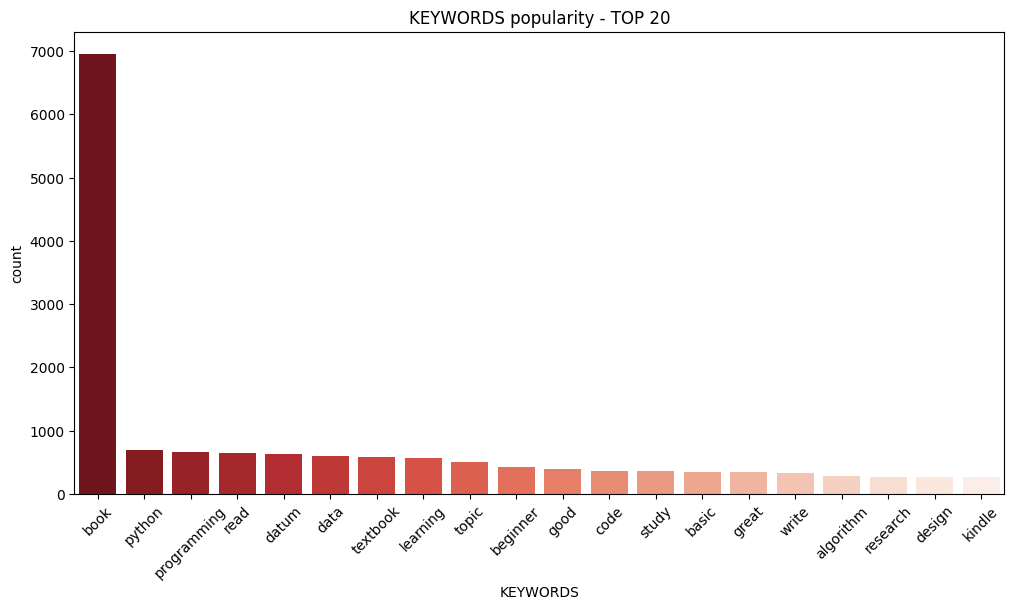

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.explode("KEYWORDS").KEYWORDS,
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:20],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 20")
plt.xticks(rotation=45)
plt.show()

## Proceso para conseguir los tópicos con BERTopic

Importar e instanciar bertopic

In [ ]:
from bertopic import BERTopic

In [ ]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["comment"].values)

Batches:   0%|          | 0/646 [00:00<?, ?it/s]

2023-10-19 02:40:57,509 - BERTopic - Transformed documents to Embeddings
2023-10-19 02:41:52,882 - BERTopic - Reduced dimensionality
2023-10-19 02:43:34,185 - BERTopic - Clustered reduced embeddings


CPU times: user 2min 52s, sys: 2.09 s, total: 2min 54s
Wall time: 3min 1s


In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8041,-1_book_datum_read_author,"[book, datum, read, author, like, work, scienc...",[outstanding introduction statistical learning...
1,0,388,0_statistic_stat_statistical_statistics,"[statistic, stat, statistical, statistics, whe...",[book happen understand statistic deep fundame...
2,1,372,1_python_programming_beginner_language,"[python, programming, beginner, language, lear...",[python crash course good python programming b...
3,2,343,2_datum_data_model_filler,"[datum, data, model, filler, chapter, science,...",[tldr brilliant book cover predictive modellin...
4,3,291,3_algorithm_structure_algorithms_java,"[algorithm, structure, algorithms, java, struc...",[great book know java want understand algorith...
...,...,...,...,...,...
257,256,10,256_rich_mental_excited_validate,"[rich, mental, excited, validate, god, self, l...",[understand author portray expect book book me...
258,257,10,257_written_sourced_save_write,"[written, sourced, save, write, writing, solid...","[solid book write sourced, book written, book ..."
259,258,10,258_satisfied_greatrabbilearnsaytapeemichaelbe...,"[satisfied, greatrabbilearnsaytapeemichaelbehe...","[satisfied shopping, fine satisfied, satisfied]"
260,259,10,259_bayesian_method_glmm_frequentist,"[bayesian, method, glmm, frequentist, jeff, an...",[reviewer mention cover cover read summary ref...


In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

,Unnamed: 0,stars,comment,book_url,NER,NOUNS,NOUN_CHUNKS,SENTENCES,SENTIMENT,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,0,POS,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130,"['phd', 'ga', 'year ago', 'sci']","['outset', 'respect', 'author', 'attack', 'phd...","[outset review respect author sheer guile, att...",2,POS,"[engineering, programming, topic]",-1,8041,-1_book_datum_read_author,"[book, datum, read, author, like, work, scienc...",[outstanding introduction statistical learning...
1,1,NEG,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130,[],"['capitalism', 'read', 'book', 'bookstore', 'r...","[capitalism good read book, nearby bookstore, ...",2,POS,"[capitalism, bookstore, amazon]",75,50,75_textbook_price_sentence_author,"[textbook, price, sentence, author, word, comm...",[worth money reasons writing book barely accep...
2,2,POS,look start datum science confused material use...,https://www.amazon.com/dp/1492041130,[],"['science', 'material', 'use', 'video', 'book'...",[datum science confused material use video boo...,1,POS,"[educational, educate, resource]",13,133,13_science_datum_field_indy,"[science, datum, field, indy, scientist, jones...","[good introduction datum science, learn fast b..."


##Exportar el dataframe final como csv

In [ ]:
df.to_csv("review_keywords_topics.csv")

##Análisis de keywords, tópicos y sentimientos

####¿Cuál es el top 10 de libros con más reseñas?

Generamos nuevo df agrupado por los campos book_url y SENTIMENT

In [ ]:
grouped_sentiment_df = df.groupby(['book_url', 'SENTIMENT']).size().reset_index(name='count')
grouped_sentiment_df.head(10)


Generamos nuevo dataframe agrupado por la url de cada libro y sumamos los valores contados de cada sentimiento para obtener el total de reviews por libro

In [ ]:
total_count_url = grouped_sentiment_df.groupby('book_url')['count'].sum().reset_index()
total_count_url.sort_values(by=['count'],ascending=False).head(10)

,book_url,count
287,https://www.amazon.com/dp/1119282713,180
720,https://www.amazon.com/dp/B01N6KSRKJ,132
0,https://www.amazon.com/dp/0062842668,90
146,https://www.amazon.com/dp/039334777X,90
701,https://www.amazon.com/dp/B01AASV9WO,90
152,https://www.amazon.com/dp/0465050654,90
154,https://www.amazon.com/dp/046509760X,90
695,https://www.amazon.com/dp/B010ZZYJSI,90
688,https://www.amazon.com/dp/B00OXDVPKE,90
684,https://www.amazon.com/dp/B00M1Z2THY,90


####¿Cuál es el libro con más reseñas?

In [ ]:
book_resenias = total_count_url.loc[total_count_url['count'].idxmax()]
book_resenias

book_url    https://www.amazon.com/dp/1119282713
count                                        180
Name: 287, dtype: object

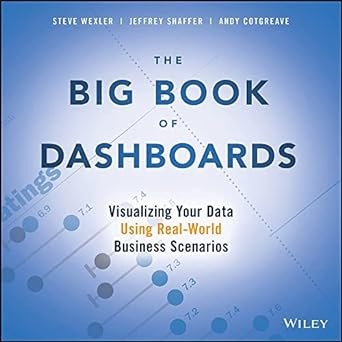

In [ ]:
Image('https://m.media-amazon.com/images/I/518yHZZNm4L._SX342_SY445_.jpg')

####¿Cuál es el libro con más reseñas positivas?

In [ ]:
grouped_pos_df = grouped_sentiment_df[grouped_sentiment_df['SENTIMENT']=='POS']
total_count_pos = grouped_pos_df.groupby('book_url')['count'].sum().reset_index()
total_count_pos.sort_values(by=['count'],ascending=False).head(10)

,book_url,count
282,https://www.amazon.com/dp/1119282713,148
692,https://www.amazon.com/dp/B01N6KSRKJ,80
128,https://www.amazon.com/dp/0358359937,79
135,https://www.amazon.com/dp/0385495323,77
656,https://www.amazon.com/dp/B00K2I2JL8,76
668,https://www.amazon.com/dp/B010ZZYJSI,76
217,https://www.amazon.com/dp/0815342209,76
518,https://www.amazon.com/dp/1617292230,74
379,https://www.amazon.com/dp/1461471370,73
190,https://www.amazon.com/dp/0596100167,73


In [ ]:
book_resenias_pos = total_count_pos.loc[total_count_pos['count'].idxmax()]
book_resenias_pos

book_url    https://www.amazon.com/dp/1119282713
count                                        148
Name: 282, dtype: object

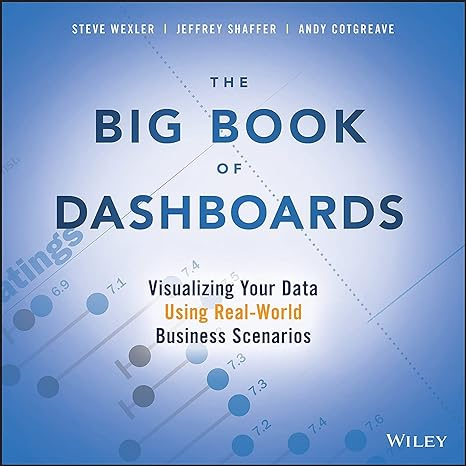

In [ ]:
Image('https://m.media-amazon.com/images/I/71OZWPlvN0L._SY466_.jpg')

####¿Cuál es el libro con más reseñas neutrales?

In [ ]:
grouped_neutral_df = grouped_sentiment_df[grouped_sentiment_df['SENTIMENT']=='NEU']
total_count_neu = grouped_neutral_df.groupby('book_url')['count'].sum().reset_index()
total_count_neu.sort_values(by=['count'],ascending=False).head(10)

,book_url,count
618,https://www.amazon.com/dp/B07NJCG1XS,49
0,https://www.amazon.com/dp/0062842668,46
625,https://www.amazon.com/dp/B07TRNVTZQ,45
161,https://www.amazon.com/dp/0553447459,44
1,https://www.amazon.com/dp/0063001691,44
589,https://www.amazon.com/dp/B01N6KSRKJ,44
297,https://www.amazon.com/dp/1419729071,43
421,https://www.amazon.com/dp/1545614105,43
616,https://www.amazon.com/dp/B07MQBDBF3,40
188,https://www.amazon.com/dp/081297381X,40


In [ ]:
book_resenias_neu = total_count_neu.loc[total_count_neu['count'].idxmax()]
book_resenias_neu

book_url    https://www.amazon.com/dp/B07NJCG1XS
count                                         49
Name: 618, dtype: object

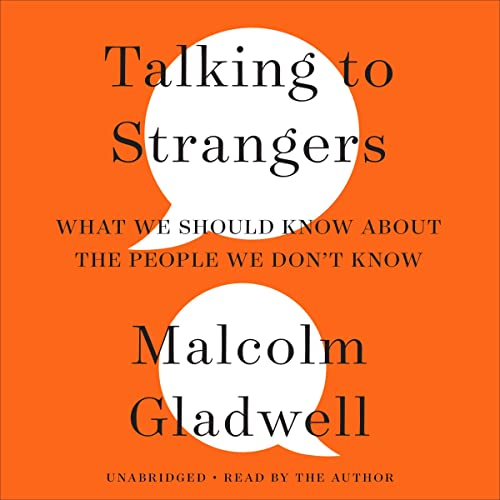

In [ ]:
Image('https://m.media-amazon.com/images/I/412zzXhmaoL.jpg')

####¿Cuál es el libro con más reseñas negativas?

In [ ]:
grouped_negativa_df = grouped_sentiment_df[grouped_sentiment_df['SENTIMENT']=='NEG']
total_count_neg = grouped_negativa_df.groupby('book_url')['count'].sum().reset_index()
total_count_neg.sort_values(by=['count'],ascending=False).head(10)

,book_url,count
313,https://www.amazon.com/dp/B0007OB40E,20
175,https://www.amazon.com/dp/1250123828,17
245,https://www.amazon.com/dp/1510752242,16
109,https://www.amazon.com/dp/0553447459,15
108,https://www.amazon.com/dp/0553418831,15
174,https://www.amazon.com/dp/1250066115,14
247,https://www.amazon.com/dp/1526436566,14
344,https://www.amazon.com/dp/B073HKGPWX,12
47,https://www.amazon.com/dp/0198739834,10
368,https://www.amazon.com/dp/B07VL5TCVF,10


In [ ]:
book_resenias_neg = total_count_neg.loc[total_count_neg['count'].idxmax()]
book_resenias_neg

book_url    https://www.amazon.com/dp/B0007OB40E
count                                         20
Name: 313, dtype: object

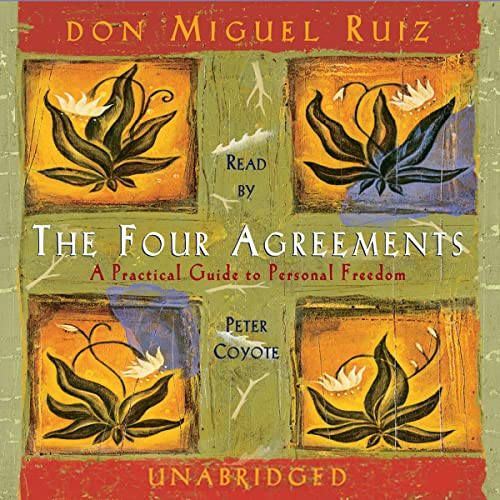

In [ ]:
Image('https://m.media-amazon.com/images/I/61bzSxyLLlL.jpg')

####¿Cuáles tópicos están asociados al libro con más reseñas positivas?

In [ ]:
topicos_book_positivo = df[df['book_url']==book_resenias_pos.book_url]
topicos_book_positivo.TOPIC_NAME.value_counts()

11_dashboard_design_visual_chart                                62
-1_book_datum_read_author                                       60
4_visualization_graph_tufte_chart                               15
217_tableau_andy_inspiration_conferenceread                      9
162_example_readanswer_exampleremain_exampleeasy                 2
136_subject_topic_forensic_grazer                                2
195_powerpoint_reasonpath_deck_chart                             2
131_need_exactly_necesssary_sendgift                             2
118_quality_material_contentlength_useheavycourse                2
109_useful_purpose_absurd_uselessly                              2
10_data_science_beginner_scientist                               2
47_lot_info_bookcover_learn                                      2
41_good_nice_bookvery_book                                       2
181_awesome_xtremely_mitnick_cute                                2
139_expect_expectdaughter_expectation_spiral                  

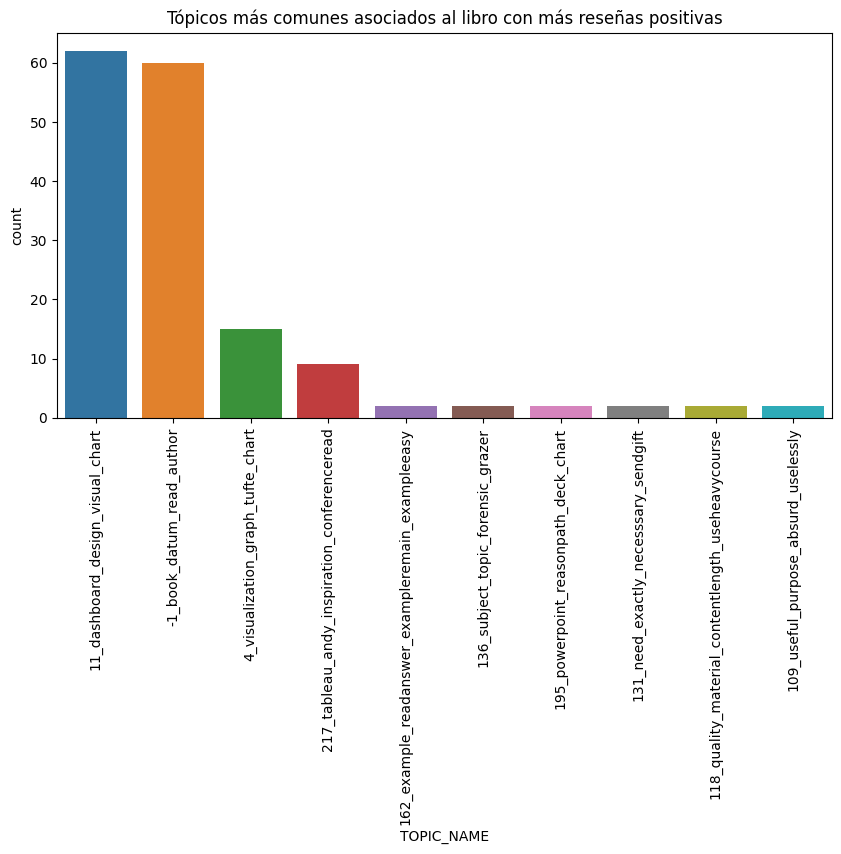

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='TOPIC_NAME', data=topicos_book_positivo, order=topicos_book_positivo.TOPIC_NAME.value_counts()[:10].index)
plt.xticks(rotation=90)
plt.title("Tópicos más comunes asociados al libro con más reseñas positivas")
plt.show()

####¿Cuáles son las keywords asociadas al libro con más reseñas positivas?

In [ ]:
topicos_book_positivo.KEYWORDS.value_counts()

['book', 'dashboard', 'visualization']                 4
['visualization', 'datum', 'dashboard']                2
['content', 'good']                                    2
['data', 'library', 'addition']                        2
['justifypay', 'book', 'chapter']                      2
                                                      ..
['designbook', 'book', 'design']                       2
['kindle', 'software', 'book']                         2
['workbook', 'analytics', 'business']                  2
['dashboardclear', 'bookpageread', 'visualization']    2
['bookshelf', 'dashboard', 'book']                     2
Name: KEYWORDS, Length: 89, dtype: int64

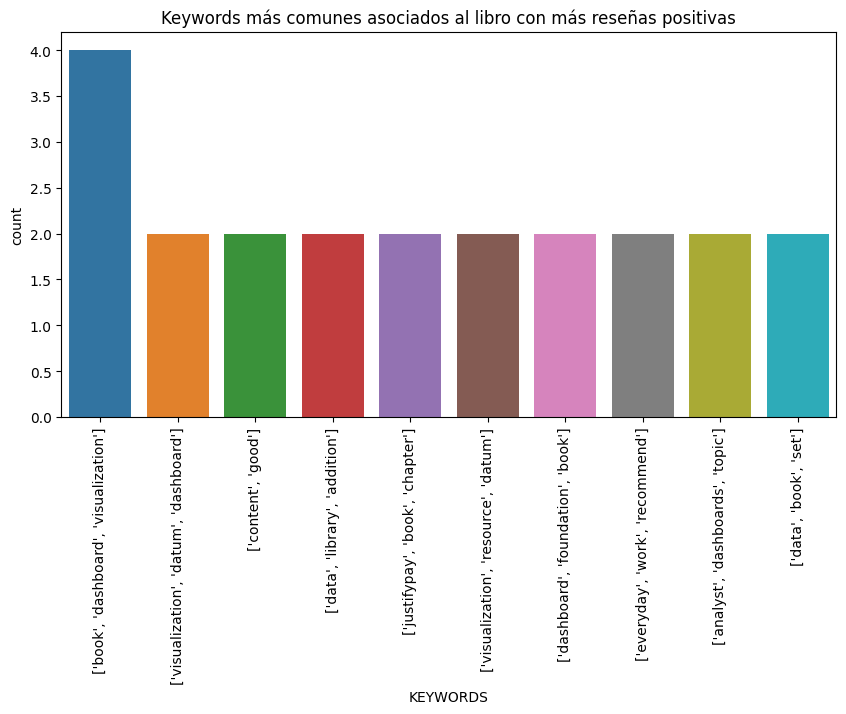

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='KEYWORDS', data=topicos_book_positivo, order=topicos_book_positivo.KEYWORDS.value_counts()[:10].index)
plt.xticks(rotation=90)
plt.title("Keywords más comunes asociados al libro con más reseñas positivas")
plt.show()

####¿Cuáles tópicos están asociados al libro con más reseñas negativas?

In [ ]:
topicos_book_negativo = df[df['book_url']==book_resenias_neg.book_url]
topicos_book_negativo.TOPIC_NAME.value_counts()

-1_book_datum_read_author                                             53
122_agreement_spiritual_ruiz_life                                     21
63_recommend_highly_research_qual                                      2
39_fiction_read_interesting_point                                      2
9_pregnancy_pregnant_oster_baby                                        1
58_hoffman_reality_perception_consciousness                            1
202_garbage_awful_rating_dislike                                       1
208_bode_beautiful_peruse_readprescribebook                            1
170_print_quality_edition_greyscale                                    1
27_profit_business_mike_cash                                           1
139_expect_expectdaughter_expectation_spiral                           1
219_psychology_buss_evolutionary_textbook                              1
162_example_readanswer_exampleremain_exampleeasy                       1
229_wordword_sayfind_givethink_eventually          

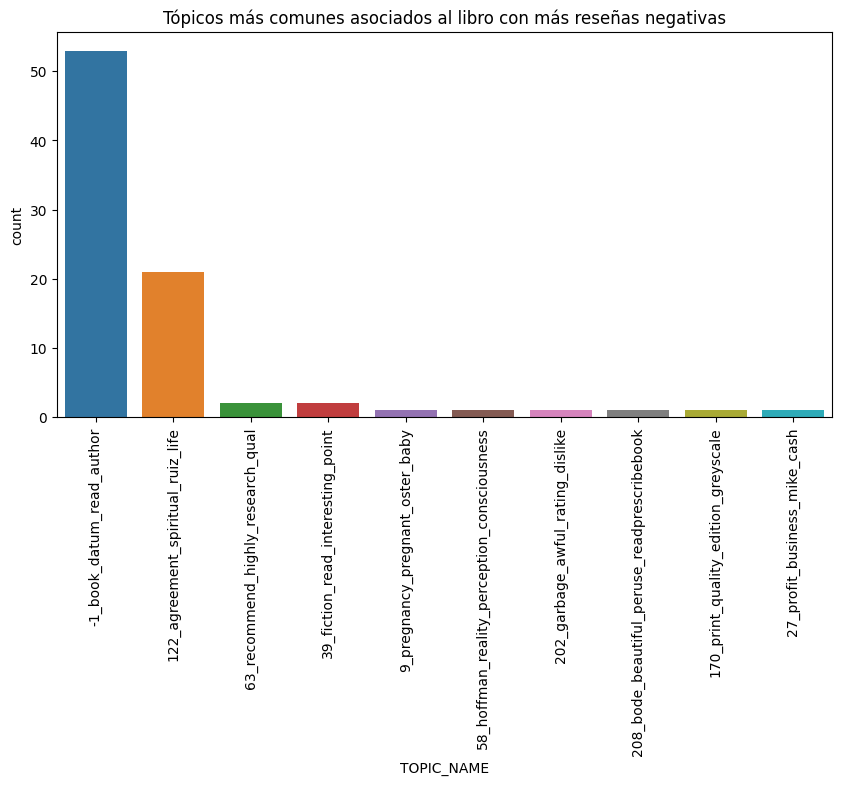

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='TOPIC_NAME', data=topicos_book_negativo, order=topicos_book_negativo.TOPIC_NAME.value_counts()[:10].index)
plt.xticks(rotation=90)
plt.title("Tópicos más comunes asociados al libro con más reseñas negativas")
plt.show()

#### ¿Cuáles son las keywords asociadas al libro con más reseñas negativas?

In [ ]:
topicos_book_negativo.KEYWORDS.value_counts()

['parent', 'perspective', 'responsible']    1
['agreement', 'brain', 'mind']              1
['disappointed', 'book', 'god']             1
['uncle', 'bookfriend', 'change']           1
['essay', 'agreement', 'summarizepage']     1
                                           ..
['paperback', 'spendtime', 'book']          1
['wisdom', 'spiritual', 'educate']          1
['writing', 'reader', 'book']               1
['accessibility', 'book', 'profession']     1
['toltec', 'bland', 'platitude']            1
Name: KEYWORDS, Length: 90, dtype: int64

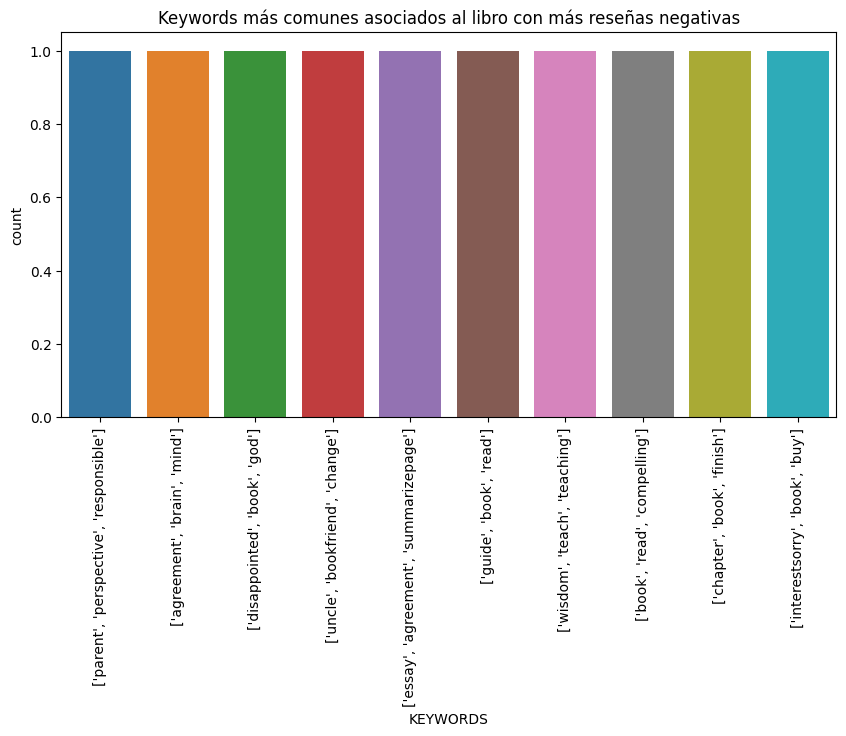

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax = sns.countplot(x='KEYWORDS', data=topicos_book_negativo, order=topicos_book_negativo.KEYWORDS.value_counts()[:10].index)
plt.xticks(rotation=90)
plt.title("Keywords más comunes asociados al libro con más reseñas negativas")
plt.show()